In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetworkGrid, set_seed

In [16]:
name = 'grid_01'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = '/home/ADF/ajl573/Data/interstellar_data'

In [7]:
tracks = Tracks()
tracks.load(load_path)

In [8]:
tracks.get_metadata().head()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1


In [9]:
tracks.get_data().head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,...,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
0,1,1.0,0.24,-0.1,2.3,1.0,0.036467,0.004031,5788.367004,0.760630,...,-2.318958,0.004365,-0.1,0.082974,-0.066947,-2.171683,0.009821,-0.153525,0.227345,-0.005322
1,1,1.0,0.24,-0.1,2.3,1.0,0.037214,0.004114,5779.922526,0.749957,...,-2.310162,0.004365,-0.1,0.082974,-0.066947,-2.162886,0.009187,-0.155325,0.230036,-0.005332
2,1,1.0,0.24,-0.1,2.3,1.0,0.038109,0.004213,5772.288187,0.741406,...,-2.299835,0.004365,-0.1,0.082974,-0.066947,-2.152559,0.008612,-0.156667,0.232046,-0.005344
3,1,1.0,0.24,-0.1,2.3,1.0,0.039184,0.004332,5766.020545,0.735484,...,-2.287759,0.004365,-0.1,0.082974,-0.066947,-2.140483,0.008141,-0.157465,0.233248,-0.005356
4,1,1.0,0.24,-0.1,2.3,1.0,0.040473,0.004474,5761.544407,0.732361,...,-2.273697,0.004365,-0.1,0.082974,-0.066947,-2.126422,0.007803,-0.157715,0.233634,-0.005372


In [10]:
tracks.norm_factors

,column,norm_column,loc,scale
0,log_frac_age,log_frac_age_norm,-0.075591,1.0
1,log_initial_mass,log_initial_mass_norm,-0.004365,1.0
2,initial_feh,initial_feh_norm,0.000000,1.0
3,log_initial_MLT,log_initial_MLT_norm,0.278754,1.0
4,log_initial_Yinit,log_initial_Yinit_norm,-0.552842,1.0
5,log_star_age,log_star_age_norm,0.733587,1.0
6,log_effective_T,log_effective_T_norm,3.752736,1.0
7,log_radius,log_radius_norm,0.092258,1.0
8,log_delta_nu_fit,log_delta_nu_fit_norm,1.995035,1.0
9,star_feh,star_feh_norm,-0.094866,1.0


In [11]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm', 'initial_feh_norm',
          'log_initial_MLT_norm', 'log_initial_Yinit_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'star_feh_norm']

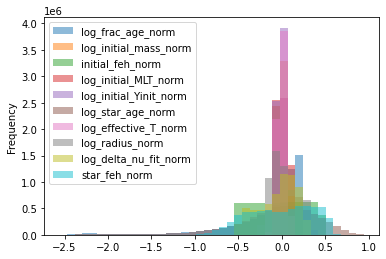

In [12]:
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [13]:
set_seed(101)

In [14]:
train = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
train.head()

,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
5323617,-0.413517,-0.066216,-0.1,0.082974,0.000000,-0.120288,-0.005565,-0.186439,0.241911,-0.047524
4920966,0.165210,0.083546,0.5,0.000000,0.029963,0.151099,-0.074603,0.292163,-0.399585,0.582609
2948371,-0.274013,0.065063,0.0,-0.102662,-0.032185,-0.388351,0.024483,0.018010,0.001718,-0.075572
229413,-0.589022,-0.046245,-0.1,0.082974,0.029963,-0.448385,0.013713,-0.168630,0.224384,-0.032936
1054345,-0.197186,-0.017912,0.4,-0.048305,0.029963,0.090516,-0.034383,-0.105606,0.148063,0.434744


In [15]:
print(f'Length of training data = {len(train)}')

Length of training data = 6454664


In [18]:
depth = [3, 4, 5]
width = [32, 64, 128]
activation = 'elu'
batch_size = int(0.01 * len(train))
regularization_l2 = 0.0
optimizer = 'nadam'
loss = 'mae'
metrics = ['mse']

In [19]:
grid = DenseNetworkGrid(path=save_path, name=name, depth=depth, width=width,
                        activation=activation, batch_size=batch_size, regularization_l2=regularization_l2)

grid.data

,depth,width,activation,batch_size,regularization_l2
name,,,,,
grid_01_0,3,32,elu,64546,0.0
grid_01_1,4,32,elu,64546,0.0
grid_01_2,5,32,elu,64546,0.0
grid_01_3,3,64,elu,64546,0.0
grid_01_4,4,64,elu,64546,0.0
grid_01_5,5,64,elu,64546,0.0
grid_01_6,3,128,elu,64546,0.0
grid_01_7,4,128,elu,64546,0.0
grid_01_8,5,128,elu,64546,0.0


In [20]:
grid.make_networks()

In [21]:
grid.build_all(len(x_cols), len(y_cols))

In [24]:
grid.compile_all(optimizer=optimizer, loss=loss, metrics=metrics)

In [32]:
grid.train_all(train, x_cols, y_cols, epochs=200, validation_split=0.2,
               callbacks=['checkpoint', 'tensorboard'], history_kw={'nth_row': 5})

Add a function which plots history for all networks.

Text(0, 0.5, 'loss (mae)')

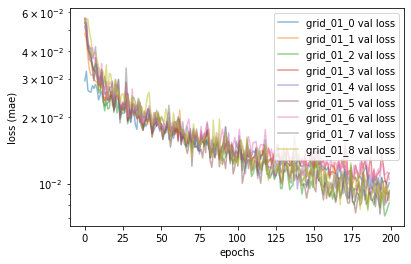

In [33]:
fig, ax = plt.subplots()
for network in grid.networks:
    network.history.plot(ax=ax, x='epochs', y=['val_loss'], logy=True, alpha=0.5,
                         label=[f'{network.name} val loss'])
ax.set_ylabel('loss (mae)')

Below should have y_col names, add this to code.

In [35]:
val = train.tail(int(0.2*len(train)))
val.head()

,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
19625,-0.238393,-0.092545,0.0,-0.102662,0.000000,0.206684,-0.043748,-0.167039,0.202718,0.017609
4203944,0.084788,0.079912,-0.3,-0.048305,0.057992,-0.384709,0.104895,0.132078,-0.192330,-0.447612
2543382,0.162067,-0.041393,0.3,-0.048305,0.000000,0.565698,-0.070023,0.109792,-0.182051,0.345019
59922,-0.259884,0.057443,0.3,-0.048305,-0.032185,-0.204505,-0.004010,-0.035951,0.082012,0.344549
1303557,-0.322364,0.021398,0.1,0.000000,-0.066947,-0.146290,-0.003772,-0.089683,0.142947,0.149114


In [40]:
grid.data

,depth,width,activation,batch_size,regularization_l2,model_filename,history_filename
name,,,,,,,
grid_01_0,3,32,elu,64546,0.0,grid_01_0_model.h5,grid_01_0_history.csv
grid_01_1,4,32,elu,64546,0.0,grid_01_1_model.h5,grid_01_1_history.csv
grid_01_2,5,32,elu,64546,0.0,grid_01_2_model.h5,grid_01_2_history.csv
grid_01_3,3,64,elu,64546,0.0,grid_01_3_model.h5,grid_01_3_history.csv
grid_01_4,4,64,elu,64546,0.0,grid_01_4_model.h5,grid_01_4_history.csv
grid_01_5,5,64,elu,64546,0.0,grid_01_5_model.h5,grid_01_5_history.csv
grid_01_6,3,128,elu,64546,0.0,grid_01_6_model.h5,grid_01_6_history.csv
grid_01_7,4,128,elu,64546,0.0,grid_01_7_model.h5,grid_01_7_history.csv
grid_01_8,5,128,elu,64546,0.0,grid_01_8_model.h5,grid_01_8_history.csv


In [43]:
import seaborn as sns

In [44]:
len(val)

1290932

In [46]:
val = val.sample(n=10000)

In [57]:
grid.evaluate_all(val)

,mae,mse
name,,
grid_01_0,0.010038,0.000354
grid_01_1,0.009145,0.000272
grid_01_2,0.008173,0.000203
grid_01_3,0.011147,0.000405
grid_01_4,0.008977,0.000241
grid_01_5,0.009406,0.000216
grid_01_6,0.010328,0.000365
grid_01_7,0.008689,0.000217
grid_01_8,0.008393,0.000190


In [58]:
grid.evaluate_all(val, inplace=True, save_data=True)
grid.data.head()

,depth,width,activation,batch_size,regularization_l2,model_filename,history_filename,mae,mse
name,,,,,,,,,
grid_01_0,3,32,elu,64546,0.0,grid_01_0_model.h5,grid_01_0_history.csv,0.010038,0.000354
grid_01_1,4,32,elu,64546,0.0,grid_01_1_model.h5,grid_01_1_history.csv,0.009145,0.000272
grid_01_2,5,32,elu,64546,0.0,grid_01_2_model.h5,grid_01_2_history.csv,0.008173,0.000203
grid_01_3,3,64,elu,64546,0.0,grid_01_3_model.h5,grid_01_3_history.csv,0.011147,0.000405
grid_01_4,4,64,elu,64546,0.0,grid_01_4_model.h5,grid_01_4_history.csv,0.008977,0.000241


In [47]:
df_dict = {}
for i, network in enumerate(grid.networks):
#     network = grid.networks[i]
    df_dict[network.name] = np.abs(network.predict(val) - val[y_cols].reset_index(drop=True))

In [48]:
df_err = pd.concat(df_dict).reset_index(level=0).rename(columns={'level_0': 'name'})
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
0,grid_01_0,0.000365,0.002332,0.004444,0.003603,0.002657
1,grid_01_0,0.007369,0.002015,0.004626,0.012444,0.058650
2,grid_01_0,0.006102,0.011607,0.014731,0.017229,0.024564
3,grid_01_0,0.000127,0.003567,0.000379,0.000993,0.022823
4,grid_01_0,0.012086,0.002591,0.000019,0.003248,0.002737


In [49]:
df_mae = pd.concat(df_dict).mean(axis=1).reset_index(level=0).rename(columns={'level_0': 'name', 0: 'mae'})
df_mae.head()

,name,mae
0,grid_01_0,0.002680
1,grid_01_0,0.017021
2,grid_01_0,0.014847
3,grid_01_0,0.005578
4,grid_01_0,0.004136


In [50]:
df_mae['log_mae'] = np.log10(df_mae['mae'])

In [51]:
order = df_mae.set_index('name').median(level=0).sort_values('log_mae', ascending=False).index

In [52]:
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
0,grid_01_0,0.000365,0.002332,0.004444,0.003603,0.002657
1,grid_01_0,0.007369,0.002015,0.004626,0.012444,0.058650
2,grid_01_0,0.006102,0.011607,0.014731,0.017229,0.024564
3,grid_01_0,0.000127,0.003567,0.000379,0.000993,0.022823
4,grid_01_0,0.012086,0.002591,0.000019,0.003248,0.002737


In [53]:
df_err_col = df_err.set_index('name').stack().reset_index().rename(columns={'level_1': 'output',
                                                                0: 'abs_err'})

df_err_col['log_abs_err'] = np.log10(df_err_col['abs_err'])

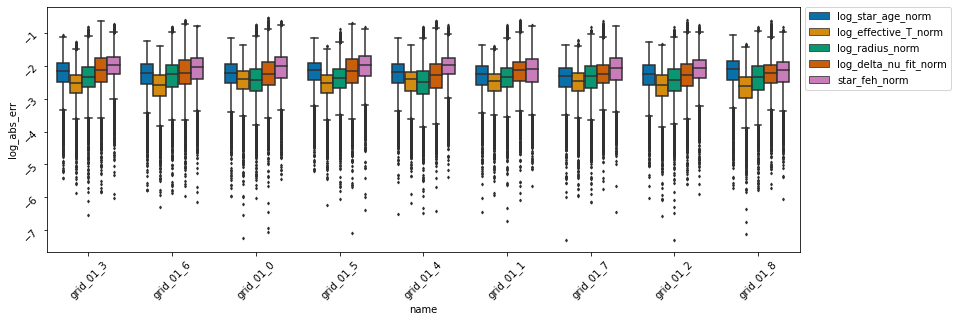

In [56]:
w = 1.5 * len(grid.data)
fig, ax = plt.subplots(figsize=(w, 4.5))
width = 0.15 * len(y_cols)
sns.boxplot(data=df_err_col, x='name', y='log_abs_err', hue='output',
            width=width, fliersize=2, color='C0', palette='colorblind',
            order=order, ax=ax, saturation=0.9)
# ax.set_yscale('log')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.legend(bbox_to_anchor=(1.0, 1.02))